In [ ]:
# import pickload
from setretrieval.utils.utils import pickload
import matplotlib.pyplot as plt
from tqdm import tqdm
from statistics import mean

In [2]:
ndata = pickload("../propercache/cache/detailed_preds/propercache_data_datastores_fiqacorpus_paircolbnormalq1d100embsize128.pkl")

In [2]:
data32 = pickload("../propercache/cache/detailed_preds/propercache_data_datastores_fiqacorpus_paircolbnormalq32d100embsize128.pkl")

In [ ]:
def nd_2_docids_posids(ndata):
    docids, posids = [], []
    for nd in ndata:
        tmp_docids, tmp_posids = [], []
        for n in nd[1]:
            tok_docids, tok_posids = [], []
            for tok in n:
                tok_docids.append(int(tok/100))
                tok_posids.append(int(tok%100))
            tmp_docids.append(tok_docids)
            tmp_posids.append(tok_posids)
        docids.append(tmp_docids)
        posids.append(tmp_posids)
    return docids, posids

In [ ]:
docids, posids = nd_2_docids_posids(ndata)

In [5]:
docids32, posids32 = nd_2_docids_posids(data32)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/accounts/projects/sewonm/prasann/.conda/envs/scaling7/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3579, in run_code
  File "/tmp/ipykernel_3710023/554081950.py", line 1, in <module>
  File "/tmp/ipykernel_3710023/997818046.py", line 8, in nd_2_docids_posids
MemoryError

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/accounts/projects/sewonm/prasann/.conda/envs/scaling7/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2170, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "/accounts/projects/sewonm/prasann/.conda/envs/scaling7/lib/python3.10/site-packages/IPython/core/ultratb.py", line 1457, in structured_traceback
  File "/accounts/projects/sewonm/prasann/.conda/envs/scaling7/lib/python3.10/site-packages/IPython/core/ultratb.py", line 1348, in structured_traceback
  File "/accounts/projects/sewonm/prasann/.c

In [62]:
len(data32[0][1][0])

5000

In [44]:
unc_dict = {k: [] for k in range(5000)}
for d in docids:
    cset = set()
    for i in range(5000):
        cset.add(d[0][i])
        unc_dict[i].append(len(cset))

Text(0, 0.5, 'total count of unique documents in this top k')

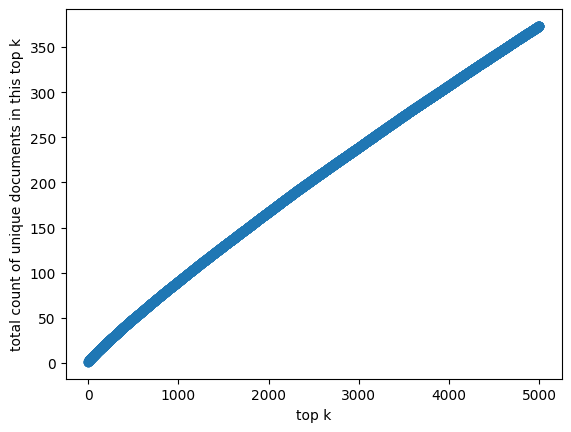

In [ ]:
# fig, ax = plt.subplots()
plt.scatter(list(range(5000)), [mean(unc_dict[i]) for i in range(5000)])
plt.xlabel("top k")
plt.ylabel("total count of unique documents in this top k")
# ax.set_xscale('log')

(array([35307., 35129., 35002., 34576., 34121., 33787., 33629., 33508.,
        33072., 32850., 32752., 32623., 32671., 32606., 32651., 32505.,
        32587., 32394., 32075., 31968., 31982., 31829., 31713., 31525.,
        31147., 30744., 30728., 30256., 29448., 32303., 36290., 36924.,
        36219., 35670., 35322., 34811., 34773., 34724., 34684., 34552.,
        34306., 34193., 34303., 34226., 34027., 33840., 33726., 33818.,
        33838., 33582., 33377., 33457., 33408., 33159., 33030., 32990.,
        32733., 32763., 32586., 32583., 32535., 32391., 32330., 32278.,
        32259., 31963., 31799., 31611., 32285., 32035., 32051., 31995.,
        31590., 31268., 31230., 31170., 31113., 31366., 30957., 31210.,
        31505., 31236., 30758., 30572., 30909., 31047., 31002., 30774.,
        30835., 30741., 30360., 30744., 31264., 31099., 30495., 30269.,
        30027., 28404., 26816., 24305.]),
 array([ 0.  ,  0.99,  1.98,  2.97,  3.96,  4.95,  5.94,  6.93,  7.92,
         8.91,  9.9 , 1

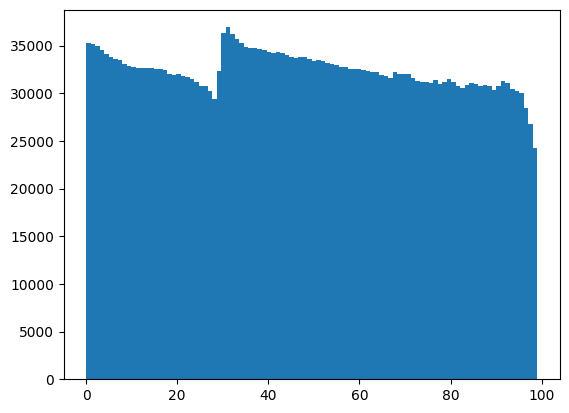

In [ ]:
pflats = []
for p in posids:
    pflats.extend(p[0])

Text(0, 0.5, 'count')

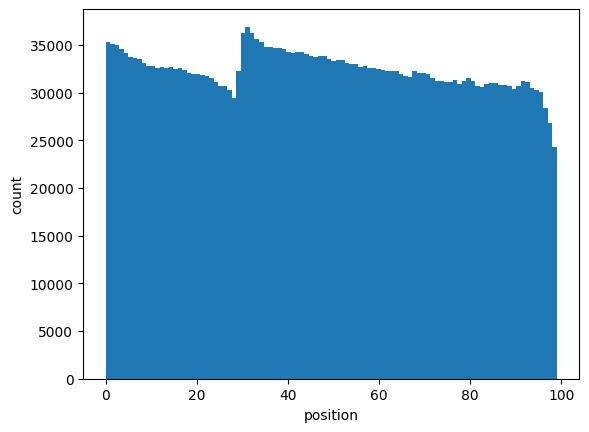

In [52]:
plt.hist(pflats, bins=100)
plt.xlabel("position")
plt.ylabel("count")


In [51]:
len(pflats)/5000

648.0

In [8]:
ndata[1][1]

array([[2158121, 3717316, 2158122, ..., 4362390, 1493612, 4748127]],
      shape=(1, 5000))

In [7]:
len(ndata)

648